In [1]:
import numpy as np
import texttable as tt
from matplotlib import pyplot as plt

In [2]:
unigram=[]
with open('hw4_unigram.txt','r') as uf:
    lines=uf.readlines()
for line in lines:
    unigram.append(int(line))


In [3]:
vocab=[]
with open('hw4_vocab.txt','r') as vb:
    lines=vb.readlines()
for line in lines:
    vocab.append(line)


In [4]:
in1=[]
in2=[]
cn=[]
with open('hw4_bigram.txt','r') as bi:
    lines=bi.readlines()
for line in lines:
    lx=line.split('\t')
    in1.append(int(lx[0]))
    in2.append(int(lx[1]))
    cn.append(int(lx[2]))

In [5]:
print(np.shape(in1))
print(np.shape(in2))
print(np.shape(cn))
print(np.shape(vocab))
print(np.shape(unigram))
print(in1[144980])

(144981,)
(144981,)
(144981,)
(500,)
(500,)
500


In [6]:
uprob=[]
untotal=np.sum(unigram)
for un in unigram:
    uprob.append(un/untotal)

In [7]:
#Task A
print('WORD        PROBABILITY')
for i,word in enumerate(vocab):
    if(word.capitalize()[0]=='M'):
        print(word+"     "+str(round(uprob[i],5)))


WORD        PROBABILITY
MILLION
     0.00207
MORE
     0.00171
MR.
     0.00144
MOST
     0.00079
MARKET
     0.00078
MAY
     0.00073
M.
     0.0007
MANY
     0.0007
MADE
     0.00056
MUCH
     0.00051
MAKE
     0.00051
MONTH
     0.00044
MONEY
     0.00044
MONTHS
     0.00041
MY
     0.0004
MONDAY
     0.00038
MAJOR
     0.00037
MILITARY
     0.00035
MEMBERS
     0.00034
MIGHT
     0.00027
MEETING
     0.00027
MUST
     0.00027
ME
     0.00026
MARCH
     0.00026
MAN
     0.00025
MS.
     0.00024
MINISTER
     0.00024
MAKING
     0.00021
MOVE
     0.00021
MILES
     0.00021


In [8]:
#Task B
pwgw1=np.zeros([500,500])
inx=0
for i,j in zip(in1,in2):
    pwgw1[i-1][j-1]=cn[inx]/unigram[i-1]
    inx+=1


In [9]:
#Task B
pwthe=pwgw1[vocab.index('THE\n')][:]
arr=np.array(pwthe)
args=arr.argsort()[-10:][::-1]
print('WORD     PROBABILITY')
for i in args:
    print(vocab[i]+"    "+str(round(pwgw1[vocab.index('THE\n')][i],5)))


WORD     PROBABILITY
<UNK>
    0.61502
U.
    0.01337
FIRST
    0.01172
COMPANY
    0.01166
NEW
    0.00945
UNITED
    0.00867
GOVERNMENT
    0.0068
NINETEEN
    0.00665
SAME
    0.00629
TWO
    0.00616


In [10]:
#Part d
def get_likelihood(sentence):
    sentence2=sentence[1:]
    prod1=1
    prod2=1
    adj1=[]
    adj2=[]
    for word1,word2 in zip(sentence,sentence2):
        prod1*=uprob[vocab.index(word2+'\n')]
        if (pwgw1[vocab.index(word1+'\n')][vocab.index(word2+'\n')]==0):
            prod2=0
            adj1.append(word1)
            adj2.append(word2)
        else:
            prod2*=pwgw1[vocab.index(word1+'\n')][vocab.index(word2+'\n')]
    return prod1,prod2,adj1,adj2

In [11]:
def print_answer(sentence):
    prod1,prod2,adj1,adj2=get_likelihood(sentence)
    print('The log likelihood of the unigram model is '+ str(np.log(prod1)))
    if(prod2==0):
        print('The log likelihood of the bigram model is undefined')
        print('The pair of adjacent words not observed in training corpus: ')
        for word1,word2 in zip(adj1,adj2):
            print(word1+'  '+word2)
    else:
        print('the log likelihood of the bigram model is '+ str(np.log(prod2)))

In [12]:
sentence=['<s>','THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
print_answer(sentence)

The log likelihood of the unigram model is -64.50944034364878
the log likelihood of the bigram model is -40.91813213378977


In [13]:
sentence=['<s>','THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
print_answer(sentence)

The log likelihood of the unigram model is -44.291934473132606
The log likelihood of the bigram model is undefined
The pair of adjacent words not observed in training corpus: 
SIXTEEN  OFFICIALS
SOLD  FIRE


In [14]:
def lambda_likelihood(sentence,sentence2,lbd):
    prod1=1
    prod2=1
    ans=1
    for word1,word2 in zip(sentence,sentence2):
        prod1=uprob[vocab.index(word2+'\n')]
        prod2=pwgw1[vocab.index(word1+'\n')][vocab.index(word2+'\n')]
        ans*=lbd*prod1+(1-lbd)*prod2
    return np.log(ans)

In [15]:
sentence=['<s>','THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
sentence2=sentence[1:]
ans=[]
for lbd in np.arange(0.1,1.1,0.05):
    ans.append(lambda_likelihood(sentence,sentence2,lbd))

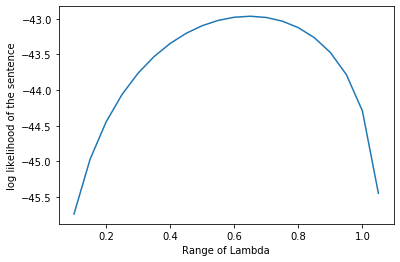

In [16]:
plt.figure(1)
plt.xlabel('Range of Lambda')
plt.ylabel('log likelihood of the sentence')
plt.plot(np.arange(0.1,1.1,0.05),ans)

In [17]:
print('max value of log likelihood '+str(np.max(ans)))
print('value of lambda at which max value of log likelihood occurs '+ str(np.arange(0.1,1.1,0.05)[np.argmax(ans)]))

max value of log likelihood -42.96416428296298
value of lambda at which max value of log likelihood occurs 0.6500000000000001
